In [170]:
import numpy as np
import astroML
import socket
import os
import datetime
import pandas as pd
import pickle

from matplotlib import pyplot as plt
from astroML.time_series import\
    lomb_scargle, lomb_scargle_BIC, lomb_scargle_bootstrap

from astroML.time_series import \
    generate_power_law

%matplotlib inline

print('Current workstation: '+str(socket.gethostname()))
if socket.gethostname()=='Osian':
    base_dir="/home/caplarn/Documents/Variability/MainSequence/"
else:
    #change below your directory where the data is to be stored
    base_dir="/export/data1/caplarn/Documents/Variability/MainSequence/"
os.chdir(base_dir)   
print('Current time: '+str(datetime.datetime.now()))       

Current workstation: iapetus
Current time: 2017-05-04 19:48:16.294447


# Creating light-curves

In [161]:
# main function
def generate_LC(beta_value):
    y=astroML.time_series.generate_power_law(N=4000,dt=1,beta=beta_value)
    starting_point=np.random.randint(1,4000-400, size=1)[0]
    return y[starting_point:starting_point+400]

In [166]:
# generates 1000 objects with 400 time steps with different slopes of power-spectrum density
for i in range(5):
    list_of_slopes=[1,1.5,2,2.5,3]
    amplitudes_of_slopes=[12,4.3,1,0.23,0.0485]
    x=np.full((1000),list_of_slopes[i])
    array_of_LC = amplitudes_of_slopes[i]*np.array([generate_LC(xi) for xi in x])
    sample_of_LC=pd.DataFrame(np.transpose(array_of_LC))
    sample_of_LC.to_pickle('sample_of_LC'+str(list_of_slopes[i])) 

# Small analysis of properties

In [177]:
# here I import two samples to show their similarities and differences
sample_of_LC1=pickle.load(open( "sample_of_LC1", "rb" ))
sample_of_LC3=pickle.load(open( "sample_of_LC3", "rb" ))

In [179]:
# the spread of the distribution is the same (4 different time points)
print((np.std(sample_of_LC1.ix[0]),np.std(sample_of_LC1.ix[100]),np.std(sample_of_LC1.ix[200]),np.std(sample_of_LC1.ix[300])))
print((np.std(sample_of_LC3.ix[0]),np.std(sample_of_LC3.ix[100]),np.std(sample_of_LC3.ix[200]),np.std(sample_of_LC3.ix[300])))

(0.30488890037680666, 0.31253026767884495, 0.29186301126124137, 0.30382497434742362)
(0.31484009470393803, 0.31639165137064645, 0.31536351127259749, 0.31154015460249512)


In [180]:
# the mean of the distribution is the same and is bascially 0 (4 different time points)
print((np.mean(sample_of_LC1.ix[0]),np.mean(sample_of_LC1.ix[100]),np.mean(sample_of_LC1.ix[200]),np.mean(sample_of_LC1.ix[300])))
print((np.mean(sample_of_LC3.ix[0]),np.mean(sample_of_LC3.ix[100]),np.mean(sample_of_LC3.ix[200]),np.mean(sample_of_LC3.ix[300])))

(-0.0091925946116160114, 0.0010785482001606677, 0.0045954421671271974, 0.013002406068497457)
(-0.016490825708333965, -0.017131965343419008, -0.015130297063166855, -0.01252606688891098)


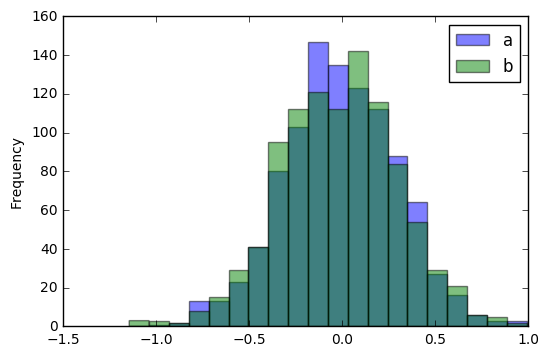

In [191]:
# the distribution look very similar
df = pd.DataFrame({'a': sample_of_LC1.ix[0],
                   'b': sample_of_LC3.ix[20]})
df.plot.hist(alpha=0.5,bins=20)

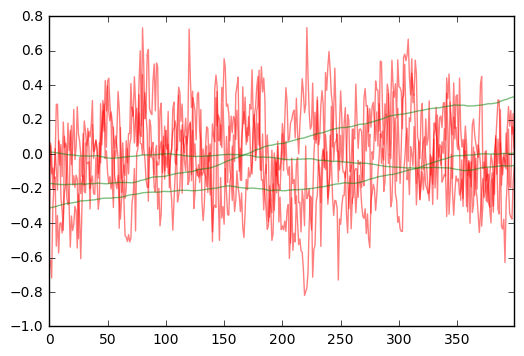

In [204]:
# but there is difference in how sSFR plays around the mean; 3 red curves and 3 green curves for different objects from different sets
df = pd.DataFrame({'a': sample_of_LC1[0],
                   'b': sample_of_LC1[1],
                   'c': sample_of_LC1[2],
                   'd': sample_of_LC3[0],
                   'e': sample_of_LC3[1],
                   'f': sample_of_LC3[2]})
plt.figure
with pd.plot_params.use('x_compat', True):
    df.a.plot(color='r',alpha=0.5)
    df.b.plot(color='r',alpha=0.5)
    df.c.plot(color='r',alpha=0.5)
    df.d.plot(color='g',alpha=0.5)
    df.e.plot(color='g',alpha=0.5)
    df.f.plot(color='g',alpha=0.5)

In [ ]:
# small code below shows another difference. In first sample all objects are "well mixed", spend some time in 
# different parts of the main sequence. In second sample this is not the case... Some object have never been in
# the upper half

In [220]:
def is_there_larger_0(x):
    if max(x)>0:
        return 1
    else:
        return 0


In [233]:
number_of_times_object_in_upper_half_of_main_sequence_in_sample1 = []
for i in range(len(sample_of_LC1)):
    number_of_times_object_in_upper_half_of_main_sequence_in_sample1.append(is_there_larger_0(sample_of_LC1[i]))
number_of_times_object_in_upper_half_of_main_sequence_in_sample3 = []
for i in range(len(sample_of_LC3)):
    number_of_times_object_in_upper_half_of_main_sequence_in_sample3.append(is_there_larger_0(sample_of_LC3[i]))
print("Fraction of objects which have at least once been in upper half of MS in first sample:"+str(np.mean(number_of_times_object_in_upper_half_of_main_sequence_in_sample1))) 
print("Fraction of objects which have at least once been in upper half of MS in second sample:"+str(np.mean(number_of_times_object_in_upper_half_of_main_sequence_in_sample3)))    

Fraction of objects which have at least once been in upper half of MS in first sample:1.0
Fraction of objects which have at least once been in upper half of MS in second sample:0.6525
